In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Data\frankfurt_final.csv")
df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "day"], inplace = True)

In [41]:

df_cut = df
df_cut = df_cut[(df_cut["orig_lat"] > 49 ) & (df_cut["orig_lat"] < 50.3)]
df_cut = df_cut[(df_cut["orig_lng"] > 8.5 ) & (df_cut["orig_lng"] < 8.9)]
df_cut = df_cut[(df_cut["dest_lng"] < 9 ) & (df_cut["dest_lng"] > 8.45 )]

df_hour_duration = df_cut

df_start = df_cut[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]] #,"distance"

# df_td['time'] = df_hour_duration.apply(lambda row: row.hour + (row.min/(60)), axis = 1)
df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [7]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[25500.638035949156, 12274.922401316853, 9563.259752887065, 7393.543749345428, 6316.250238304544, 5458.508022996882, 4796.733097507772, 4189.884171113457, 3789.9360258009, 3431.0329641135513]


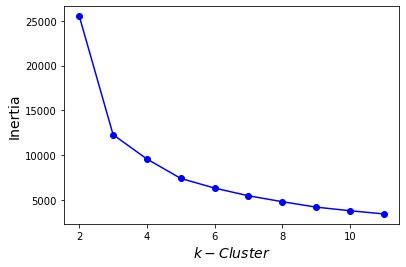

In [8]:
plt.plot(range(2, 12), inertias, "bo-")
plt.xlabel("$k-Cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


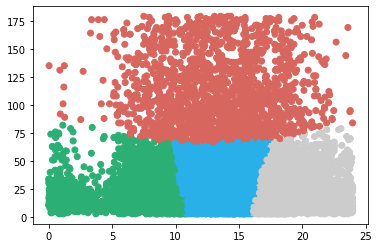

In [42]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
# array = df_td[:100].to_numpy()
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC",
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

# plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

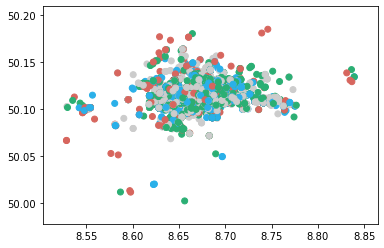

In [39]:
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)

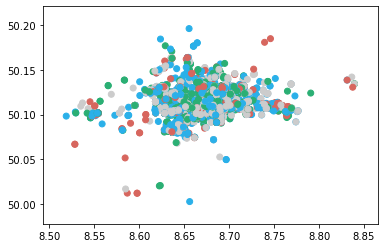

In [43]:
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)

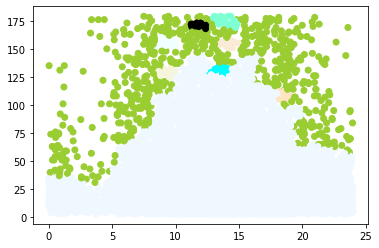

In [10]:
# n_clusters = 4
# kmeans_cluster = DBSCAN(eps=0.15, min_samples=15) #50.5
# # array = df_td[:100].to_numpy()
# array = df_td.to_numpy()
# array = StandardScaler().fit_transform(array)
# labels = kmeans_cluster.fit_predict(array)
# label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC",
#                 "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
# colors_all = list(mpc.cnames.values())
# # colors_all = label_colors
# colors = [colors_all[i] for i in labels]
#
# # plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
# plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

In [11]:
# array = df_td.to_numpy()
# array = StandardScaler().fit_transform(array)
# kmeans_per_k = [GaussianMixture(n_components=k, random_state=42, init_params='kmeans').fit(array)
#                 for k in range(2, 12)]
# inertias = [model.lower_bound_ for model in kmeans_per_k]
# print(inertias)

[-2.2304240801644024, -2.1927816729314396, -2.130594094088491, -2.132613277024832, -2.104288830401079, -2.107246012239555, -2.1015123457385134, -2.0987697038575424, -2.07871602208706, -2.079779314268243]


c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\mixture\base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


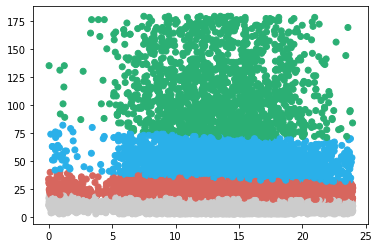

In [12]:
# n_clusters = 4
# alg = BayesianGaussianMixture(n_components=n_clusters, init_params='random')
# # array = df_td[:100].to_numpy()
# array = df_td.to_numpy()
# array = StandardScaler().fit_transform(array)
# labels = alg.fit_predict(array)
# label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC",
#                 "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
#
# colors = [label_colors[i] for i in labels]
#
# # plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
# plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

In [13]:
# array = df_start.to_numpy()
# array = StandardScaler().fit_transform(array)
# kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
#                 for k in range(2, 12)]
# # kmeans_per_k = [GaussianMixture(n_components=k, random_state=42, init_params='kmeans').fit(df_start)
# #                 for k in range(2, 12)]
#
# inertias = [model.inertia_ for model in kmeans_per_k]
# # inertias = [model.lower_bound_ for model in kmeans_per_k]
# print(inertias)

[5553.8497804865, 2532.702528745527, 1626.7594727852386, 855.6892429122039, 525.4596920345762, 359.3853324289471, 268.8566127551915, 216.62049949226883, 186.86636054735862, 158.33493291836695]


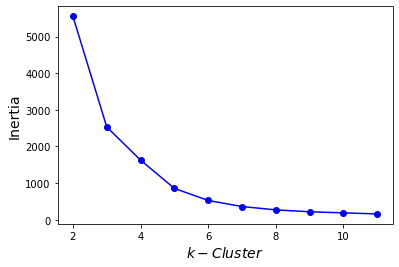

In [14]:
# plt.plot(range(2, 12), inertias, "bo-")
# plt.xlabel("$k-Cluster$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.show()

In [15]:
# df_start = df_start[(df_start["orig_lat"] > 49 ) & (df_start["orig_lat"] < 50.3)]
# df_start = df_start[(df_start["orig_lng"] > 8.5 ) & (df_start["orig_lng"] < 8.9)]

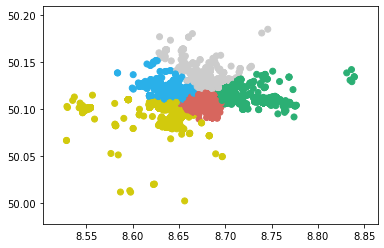

In [16]:
# n_clusters = 5
# kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
# # array = df_td[:100].to_numpy()
# array = df_start.to_numpy()
# array = StandardScaler().fit_transform(array)
# labels = kmeans_cluster.fit_predict(array)
# label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC",
#                 "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
#
# colors = [label_colors[i] for i in labels]
#
# # plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
# plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)